In [ ]:
%load_ext autoreload
%autoreload 2

from helper_rwi_iwi import *
import handlers as main

In [2]:
MAIN_ROOT = '../data'
MAIN_RESULTS = 'results'

In [3]:
RWI_PRED_PATH = '../resources/Facebook/RWI/' 
# <ccode3>_relative_wealth_index.csv: latitude, longitude, rwi, error

IWI_PRED_PATH = f'{MAIN_RESULTS}/pplaces_inference/' 
# <ccode2>_<model>_<years>_<features>.csv: OSMID, pred_mean_wi, pred_std_wi
# <ccode2>_features_<features>.csv: OSMID, lat, lon, rural, place, name, ... 

LEE_PRED_PATH = '../resources/worldbank/IWI/'
# <country>/<country>_estimated_wealth_index.csv.zip: lat, lon, estimated_IWI

BOUNDARY_FN = '../resources/geoBoundaries/<country>/geoBoundaries-<ccode3>-ADM<ADM>-all.zip'
ADMIN_LEVEL5 = 5
ADMIN_LEVEL4 = 4
ADMIN_LEVEL3 = 3
ADMIN_LEVEL2 = 2
ADMIN_LEVEL1 = 1
ADMIN_LEVEL0 = 0

GINI_FN = '../resources/worldbank/gini_index/API_SI.POV.GINI_DS2_en_csv_v2_16.csv'
GDP_FN = '../resources/worldbank/gdp_per_capita_USD/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_184.csv'
OUTPUT_DIR = 'comparison-results'

In [4]:
# source rwi: https://www.pnas.org/doi/suppl/10.1073/pnas.2113658119/suppl_file/pnas.2113658119.sapp.pdf
SURVEY_YEAR = {'Sierra Leone':{MCHI:2013, MESP:None, MLEE:2016}, #iwi-lee: '2019,2016,2013,2008'
               'Liberia':{MCHI:2013, MESP:None, MLEE:2016}, #'2022,2019,2016,2013,2011'
               'Uganda':{MCHI:2016, MESP:None, MLEE:'2016,2018-19'}, #'2018,2016,2014,2011,2009'
               'Rwanda':{MCHI:'2014-15', MESP:None, MLEE:'2014-15'}, #'2019,2014,2010,2007,2005'
               'South Africa':{MCHI:2016, MESP:None, MLEE:2016},
               'Gabon':{MCHI:2012, MESP:None, MLEE:None}, #'2019,2012'               
              }

COUNTRY_ORDER = [c for c in ['Sierra Leone','Liberia','Uganda','Rwanda','South Africa','Gabon'] if c in SURVEY_YEAR.keys()]
NCOUNTRIES = len(SURVEY_YEAR)
for country,obj in SURVEY_YEAR.items():
    obj[MESP] = COUNTRIES[country]['years']
    
SURVEY_YEAR['Uganda'][MESP]='2016,2018-19'
SURVEY_YEAR['South Africa'][MESP]=2016
NCOUNTRIES, SURVEY_YEAR  

(6,
 {'Sierra Leone': {'M3': 2013, 'M2': '2016,2019', 'M1': 2016},
  'Liberia': {'M3': 2013, 'M2': '2019,2022', 'M1': 2016},
  'Uganda': {'M3': 2016, 'M2': '2016,2018-19', 'M1': '2016,2018-19'},
  'Rwanda': {'M3': '2014-15', 'M2': '2019', 'M1': '2014-15'},
  'South Africa': {'M3': 2016, 'M2': 2016, 'M1': 2016},
  'Gabon': {'M3': 2012, 'M2': '2019', 'M1': None}})

In [5]:
model = None #'CB'
features_source = 'OCI_FBP_NTLL_OSM'
RESCALE = True
IMG_QUALITY = 300 # 300 HQ

figsize = (10,10)
kwargs_raw_map = {'figsize':figsize, 'markersize':0.5, 'cmap':'RdYlBu', 'legend':True, 'title':True, 'suptitle':False, 'kind':None, 'legend_kwds':{'shrink': 0.2}, 'years':SURVEY_YEAR, 'dpi':IMG_QUALITY} 
kwargs_mean = {'figsize':(5,5), 'markersize':0.5, 'cmap':'BrBG', 'legend':True, 'title':True, 'suptitle':False, 'kind':NORM_MEAN_GROUP, 'legend_kwds':{'shrink': 0.2}, 'years':SURVEY_YEAR, 'dpi':IMG_QUALITY} 
kwargs_admin = {'figsize':figsize, 'cmap':'BrBG', 'legend':True, 'title':True, 'suptitle':False, 'kind':NORM_MEAN_GROUP, 'legend_kwds':{'shrink': 0.2, 'location': 'right'}, 'samecolorbar':True, 'years':SURVEY_YEAR, 'dpi':IMG_QUALITY} 

figsize = (10,4)
kwargs_dist = {'figsize':figsize, 'title':True, 'suptitle':False, 'years':SURVEY_YEAR, 'dpi':IMG_QUALITY}

figsize = (10,4)
MAX_DISTANCE_OVERLAP = 500
kwargs_overlap = {'figsize':figsize, 'suptitle':False, 'legend_kwds':{'shrink': 0.4}, 'markersize':4, 'max_distance':MAX_DISTANCE_OVERLAP, 'years':SURVEY_YEAR, 'dpi':IMG_QUALITY}


In [6]:
sns_paper_style()
set_latex()

# Preliminaries

../resources/worldbank/gini_index/API_SI.POV.GINI_DS2_en_csv_v2_16.csv loaded!
../resources/worldbank/gdp_per_capita_USD/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_184.csv loaded!
comparison-results/data_preliminaries.tex saved!
comparison-results/data_preliminaries.pdf saved!


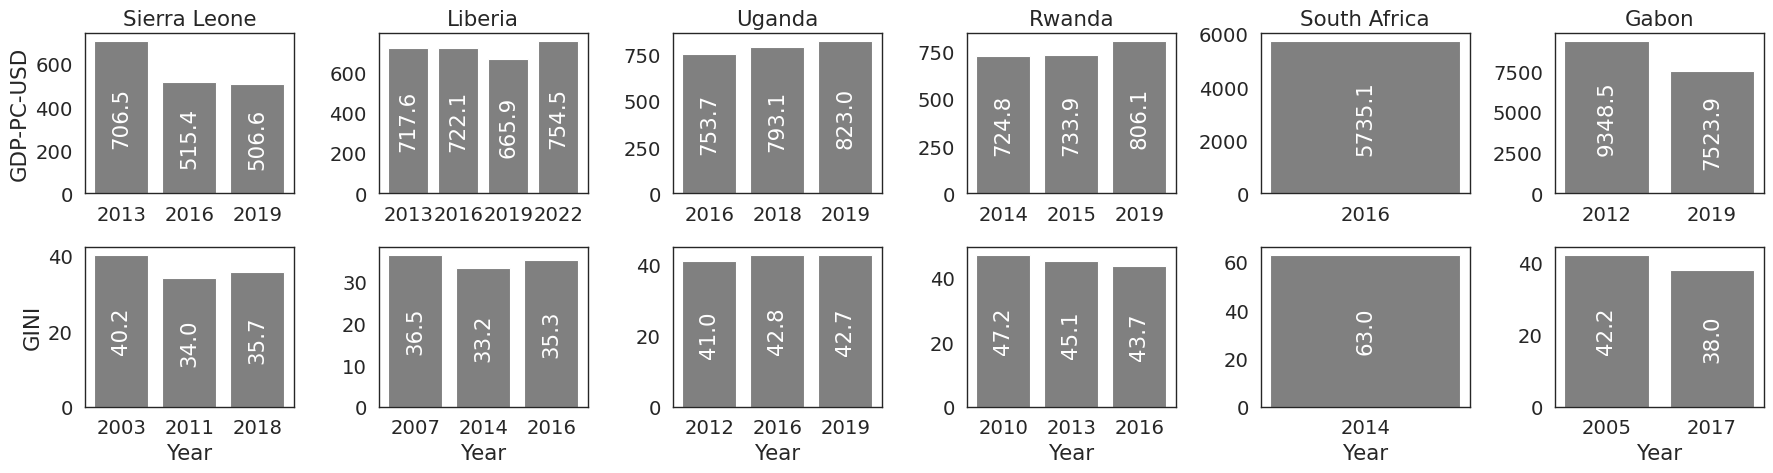

In [7]:
df_preliminaries = show_preliminaries(GINI_FN, GDP_FN, SURVEY_YEAR, OUTPUT_DIR)

df_preliminaries['country'] = pd.Categorical(df_preliminaries['country'], categories=COUNTRY_ORDER, ordered=True)
df_preliminaries = df_preliminaries.sort_values('country')

plot_preliminaries(df_preliminaries, OUTPUT_DIR, figsize=(NCOUNTRIES*3,5), suptitle=False)

In [8]:
df_preliminaries

country year_survey        _gini          gdp  in_M1  in_M2  in_M3  \
0   Sierra Leone        2013  40.2 (2003)   706.452682  False  False   True   
1   Sierra Leone        2016  34.0 (2011)   515.447840   True   True  False   
2   Sierra Leone        2019  35.7 (2018)   506.606914  False   True  False   
3        Liberia        2013  36.5 (2007)   717.635753  False  False   True   
4        Liberia        2016  33.2 (2014)   722.131227   True  False  False   
5        Liberia        2019  35.3 (2016)   665.878448  False   True  False   
6        Liberia        2022         None   754.532843  False   True  False   
7         Uganda        2016  41.0 (2012)   753.684406   True   True   True   
8         Uganda        2018  42.8 (2016)   793.128082   True   True  False   
9         Uganda        2019  42.7 (2019)   823.024733   True   True  False   
10        Rwanda        2014  47.2 (2010)   724.792350   True  False   True   
11        Rwanda        2015  45.1 (2013)   733.887473   True  False   True   
12        Rwanda        2019  43.7 (2016)   806.100820  False   True  False   
13  South Africa        2016  63.0 (2014)  5735.066787   True   True   True   
14         Gabon        2012  42.2 (2005)  9348.514876  False  False   True   
15         Gabon        2019  38.0 (2017)  7523.862281  False   True  False   

    actual_gini actual_year  
0          40.2        2003  
1          34.0        2011  
2          35.7        2018  
3          36.5        2007  
4          33.2        2014  
5          35.3        2016  
6           NaN        2022  
7          41.0        2012  
8          42.8        2016  
9          42.7        2019  
10         47.2        2010  
11         45.1        2013  
12         43.7        2016  
13         63.0        2014  
14         42.2        2005  
15         38.0        2017

In [9]:
df_expectations = show_expected_differences(df_preliminaries, OUTPUT_DIR)
df_expectations

comparison-results/data_expectations.tex saved!


gini_M1_M2  \
country                           
Sierra Leone               None   
Liberia                    None   
Uganda        very similar Gini   
Rwanda                     None   
South Africa  very similar Gini   
Gabon                        NA   

                                                      gdp_M1_M2  \
country                                                           
Sierra Leone  similar or slightly higher GDP (M1 is slightly...   
Liberia       similar or slightly higher GDP (M1 is slightly...   
Uganda                                              similar GDP   
Rwanda        similar or slightly lower GDP (M1 is slightly ...   
South Africa                                        similar GDP   
Gabon                                                        NA   

             gini_M1_M2_value  gdp_M1_M2_value         gini_M1_M3  \
country                                                             
Sierra Leone             None         0.004306  very similar Gini   
Liberia                  None         0.008326  very similar Gini   
Uganda                      0         0.000000               None   
Rwanda                   None        -0.049993  very similar Gini   
South Africa                0         0.000000  very similar Gini   
Gabon                    None              NaN                 NA   

                                                      gdp_M1_M3  \
country                                                           
Sierra Leone                           lower GDP (M1 is poorer)   
Liberia       similar or slightly higher GDP (M1 is slightly...   
Uganda        similar or slightly higher GDP (M1 is slightly...   
Rwanda                                              similar GDP   
South Africa                                        similar GDP   
Gabon                                                        NA   

             gini_M1_M3_value  gdp_M1_M3_value         gini_M2_M3  \
country                                                             
Sierra Leone                0        -0.156318               None   
Liberia                     0         0.003122               None   
Uganda                   None         0.023491               None   
Rwanda                      0         0.000000               None   
South Africa                0         0.000000  very similar Gini   
Gabon                    None              NaN  very similar Gini   

                                                      gdp_M2_M3  \
country                                                           
Sierra Leone                           lower GDP (M2 is poorer)   
Liberia       similar or slightly lower GDP (M2 is slightly ...   
Uganda        similar or slightly higher GDP (M2 is slightly...   
Rwanda        similar or slightly higher GDP (M2 is slightly...   
South Africa                                        similar GDP   
Gabon                                  lower GDP (M2 is poorer)   

             gini_M2_M3_value  gdp_M2_M3_value  
country                                         
Sierra Leone             None        -0.160516  
Liberia                  None        -0.005204  
Uganda                   None         0.023491  
Rwanda                   None         0.049993  
South Africa                0         0.000000  
Gabon                       0        -0.108144

In [10]:
cols = [f'gdp_{model1}_{model2}' for model1, model2 in MODEL_PAIRS] + [f'gini_{model1}_{model2}' for model1, model2 in MODEL_PAIRS]
print(df_expectations[cols].to_latex())

\begin{tabular}{lllllll}
\toprule
{} &                                          gdp\_M1\_M2 &                                          gdp\_M1\_M3 &                                          gdp\_M2\_M3 &         gini\_M1\_M2 &         gini\_M1\_M3 &         gini\_M2\_M3 \\
country      &                                                    &                                                    &                                                    &                    &                    &                    \\
\midrule
Sierra Leone &  similar or slightly higher GDP (M1 is slightly... &                           lower GDP (M1 is poorer) &                           lower GDP (M2 is poorer) &               None &  very similar Gini &               None \\
Liberia      &  similar or slightly higher GDP (M1 is slightly... &  similar or slightly higher GDP (M1 is slightly... &  similar or slightly lower GDP (M2 is slightly ... &               None &  very similar Gini &               None \\
Uga

In [11]:
for id, row in df_expectations[[f'gdp_{MLEE}_{MESP}']].iterrows():
    print(id, row.iloc[0])

Sierra Leone similar or slightly higher GDP (M1 is slightly richer)
Liberia similar or slightly higher GDP (M1 is slightly richer)
Uganda similar GDP
Rwanda similar or slightly lower GDP (M1 is slightly poorer)
South Africa similar GDP
Gabon NA


# Summary

In [12]:
df_rs = main.get_residuals(root=MAIN_ROOT, countries=COUNTRY_ORDER, output=MAIN_RESULTS)
df_dr = main.get_performance_from_predictions(df_rs=df_rs, output=MAIN_RESULTS)

metric = 'rmse'
best_models = main.select_best_model(df_dr, features_source, metric, COUNTRY_ORDER)

best_models = best_models['model'].to_dict()
best_models

{'Sierra Leone': 'CB',
 'Liberia': 'CB',
 'Uganda': 'CB$_w$',
 'Rwanda': 'CB$_w$',
 'South Africa': 'CNN$_a$+CB',
 'Gabon': 'CNN$_a$+CB'}

In [13]:
df_summary = show_final_summary(df_preliminaries, df_expectations, SURVEY_YEAR, best_models, features_source, RWI_PRED_PATH, LEE_PRED_PATH, IWI_PRED_PATH, MAX_DISTANCE_OVERLAP, OUTPUT_DIR)
df_summary.loc[:,'ccode'] = df_summary.country.apply(lambda v: COUNTRIES[v]['code3'])
df_summary.loc[:,'empty'] = ''
df_summary

Sierra Leone CB
Liberia CB
Uganda CB$_w$
Rwanda CB$_w$
South Africa CNN$_a$+CB
Gabon CNN$_a$+CB
comparison-results/summary.tex saved!


country      M1_years   M1_n    M1_mean     M1_std      M1_var  \
0  Sierra Leone          2016  13040  18.925030  10.335924  106.823142   
1       Liberia          2016  16525  14.567596   8.790917   77.275547   
2        Uganda  2016,2018-19  27482  22.267965  11.258861  126.757332   
3        Rwanda       2014-15  23323  24.397476  14.514840  210.671556   
4  South Africa          2016  22687  61.140341  18.098782  327.551469   
5         Gabon          None   4835  21.890469   8.859387   78.472503   

     M1_gini  M1_skewness_stat M1_skewness_pv M1_skewness_stat_str  ...  \
0  23.014204         72.152651            ***            72.15 ***  ...   
1  25.930968         90.735621            ***            90.74 ***  ...   
2  25.093004         87.226181            ***            87.23 ***  ...   
3  28.961133         75.307345            ***            75.31 ***  ...   
4  16.847258          4.123986            ***             4.12 ***  ...   
5  17.925914         46.596894            ***            46.60 ***  ...   

  overlap_M2_M3_mean_wealth_diff_norm  \
0                           -0.162280   
1                           -0.105055   
2                           -0.023244   
3                           -0.005293   
4                           -0.044783   
5                           -0.026938   

   overlap_M2_M3_expected_wealth_diff_norm  overlap_M2_M3_mean_wealth_ztest  \
0                                -0.160516                       -34.458393   
1                                -0.005204                       -39.620877   
2                                 0.023491                       -17.287082   
3                                 0.049993                        -0.930859   
4                                 0.000000                        -5.000084   
5                                -0.108144                        -2.034361   

   overlap_M2_M3_mean_ro  overlap_M2_M3_gini_M2  overlap_M2_M3_gini_M3  \
0               0.69 ***              11.014368               9.934698   
1               0.53 ***               7.240947               6.727204   
2               0.73 ***               4.894664               4.936172   
3                 0.25 *               4.120156               4.389738   
4               0.59 ***              15.615302               9.599909   
5               0.62 ***               8.175223               4.885444   

   overlap_M2_M3_gini_diff overlap_M2_M3_expected_gini_diff ccode empty  
0                 1.079670                             None   SLE        
1                 0.513742                             None   LBR        
2                -0.041508                             None   UGA        
3                -0.269582                             None   RWA        
4                 6.015393                                0   ZAF        
5                 3.289778                                0   GAB        

[6 rows x 98 columns]

In [14]:
## YEARS for each model
print(df_summary[['country'] + [f'{model}_years' for model in MODEL_ORDER]].set_index('country').to_latex())

\begin{tabular}{llll}
\toprule
{} &      M1\_years &      M2\_years & M3\_years \\
country      &               &               &          \\
\midrule
Sierra Leone &          2016 &     2016,2019 &     2013 \\
Liberia      &          2016 &     2019,2022 &     2013 \\
Uganda       &  2016,2018-19 &  2016,2018-19 &     2016 \\
Rwanda       &       2014-15 &          2019 &  2014-15 \\
South Africa &          2016 &          2016 &     2016 \\
Gabon        &          None &          2019 &     2012 \\
\bottomrule
\end{tabular}



In [15]:
## PREDICTION stats for each model
cols = list(itertools.chain(*[['empty',f'{model}_n',f'{model}_mean',f'{model}_std',f'{model}_gini',f'{model}_skewness_stat'] for model in MODEL_ORDER]))
cols.remove(f"{MCHI}_gini")
print(df_summary.set_index('ccode')[cols].round(2).to_latex())

\begin{tabular}{llrrrrrlrrrrrlrrrr}
\toprule
{} & empty &   M1\_n &  M1\_mean &  M1\_std &  M1\_gini &  M1\_skewness\_stat & empty &   M2\_n &  M2\_mean &  M2\_std &  M2\_gini &  M2\_skewness\_stat & empty &   M3\_n &  M3\_mean &  M3\_std &  M3\_skewness\_stat \\
ccode &       &        &          &         &          &                   &       &        &          &         &          &                   &       &        &          &         &                   \\
\midrule
SLE   &       &  13040 &    18.93 &   10.34 &    23.01 &             72.15 &       &   9881 &    21.87 &    6.09 &    11.54 &             70.52 &       &   8435 &    -0.35 &    0.29 &             44.13 \\
LBR   &       &  16525 &    14.57 &    8.79 &    25.93 &             90.74 &       &  15597 &    23.35 &    3.74 &     7.75 &             75.15 &       &   6189 &    -0.38 &    0.33 &             36.12 \\
UGA   &       &  27482 &    22.27 &   11.26 &    25.09 &             87.23 &       &  27791 &    41.83 &    5.21

In [16]:
## EXPECTED & OBTAINED stats for each pair of models (whole distributions)
cols = list(itertools.chain(*[[f'empty', f'diff_{model1}_{model2}_wealth_expected',f'diff_{model1}_{model2}_wealth_obtained',f'diff_{model1}_{model2}_gini_expected',f'diff_{model1}_{model2}_gini_obtained',f'ks_{model1}_{model2}'] for (model1, model2) in [(MLEE, MESP)]]))
print(df_summary.set_index('ccode')[cols].round(2).to_latex())

\begin{tabular}{llrrlrl}
\toprule
{} & empty &  diff\_M1\_M2\_wealth\_expected &  diff\_M1\_M2\_wealth\_obtained & diff\_M1\_M2\_gini\_expected &  diff\_M1\_M2\_gini\_obtained &  ks\_M1\_M2 \\
ccode &       &                             &                             &                          &                           &           \\
\midrule
SLE   &       &                        0.00 &                       -0.07 &                     None &                     11.47 &  0.62 *** \\
LBR   &       &                        0.01 &                       -0.23 &                     None &                     18.19 &  0.83 *** \\
UGA   &       &                        0.00 &                       -0.31 &                        0 &                     19.15 &  0.87 *** \\
RWA   &       &                       -0.05 &                       -0.32 &                     None &                     25.22 &  0.85 *** \\
ZAF   &       &                        0.00 &                        0.07 &   

In [17]:
## EXPECTED & OBTAINED stats for each pair of models (overlapping locations)
cols = list(itertools.chain(*[[f'empty',f'overlap_{model1}_{model2}_n', 
                               f'overlap_{model1}_{model2}_pct_{model1}', f'overlap_{model1}_{model2}_pct_{model2}',
                               f'overlap_{model1}_{model2}_rmse', 
                               f'overlap_{model1}_{model2}_mean_ro', 
                               f'overlap_{model1}_{model2}_expected_wealth_diff_norm', 
                               f'overlap_{model1}_{model2}_mean_wealth_diff_norm', 
                               f'overlap_{model1}_{model2}_expected_gini_diff',
                               f'overlap_{model1}_{model2}_gini_diff',
                              ] for (model1, model2) in [(MLEE, MESP)]]))
print(df_summary.set_index('ccode')[cols].round(2).to_latex())

\begin{tabular}{llrrrrlrrlr}
\toprule
{} & empty &  overlap\_M1\_M2\_n &  overlap\_M1\_M2\_pct\_M1 &  overlap\_M1\_M2\_pct\_M2 &  overlap\_M1\_M2\_rmse & overlap\_M1\_M2\_mean\_ro &  overlap\_M1\_M2\_expected\_wealth\_diff\_norm &  overlap\_M1\_M2\_mean\_wealth\_diff\_norm & overlap\_M1\_M2\_expected\_gini\_diff &  overlap\_M1\_M2\_gini\_diff \\
ccode &       &                  &                       &                       &                     &                       &                                          &                                      &                                  &                          \\
\midrule
SLE   &       &             6227 &                 47.75 &                 63.02 &                6.63 &              0.80 *** &                                     0.00 &                                -0.10 &                             None &                     8.89 \\
LBR   &       &            13786 &                 83.43 &                 88.39 &             

# Paper

## Overview

comparison-results/plot_distributions_all_models.pdf saved!


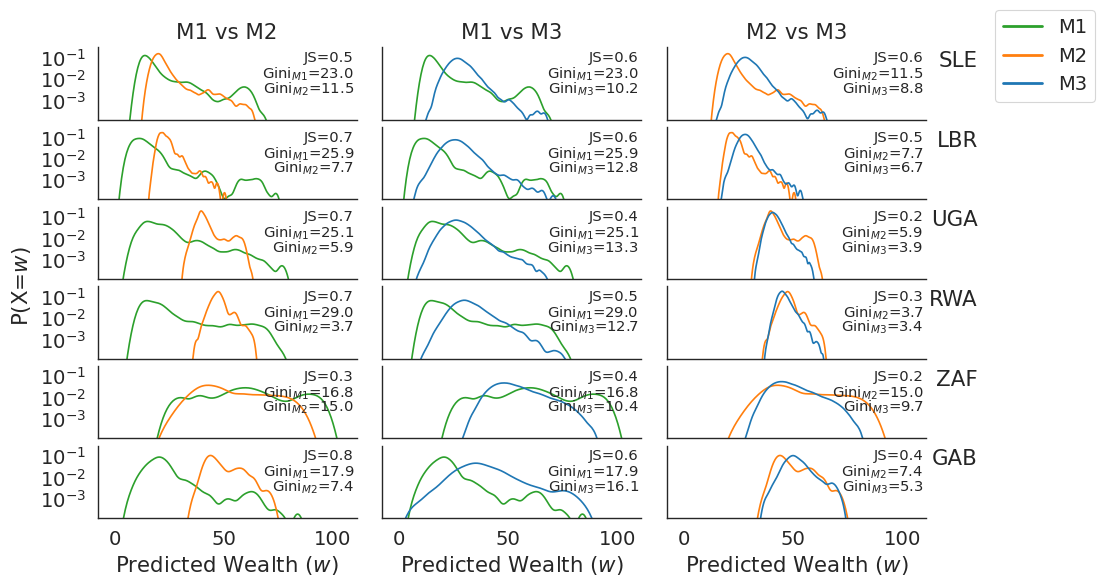

In [18]:
plot_wealth_distributions(COUNTRY_ORDER, best_models, features_source, RWI_PRED_PATH, LEE_PRED_PATH, IWI_PRED_PATH, model_pairs=MODEL_PAIRS, output_dir=OUTPUT_DIR, 
                          **{'figsize':(10,6), 'yscale':'log'})

## Predicted Poverty Maps

comparison-results/maps_HQ_DIST_SLE.pdf saved!


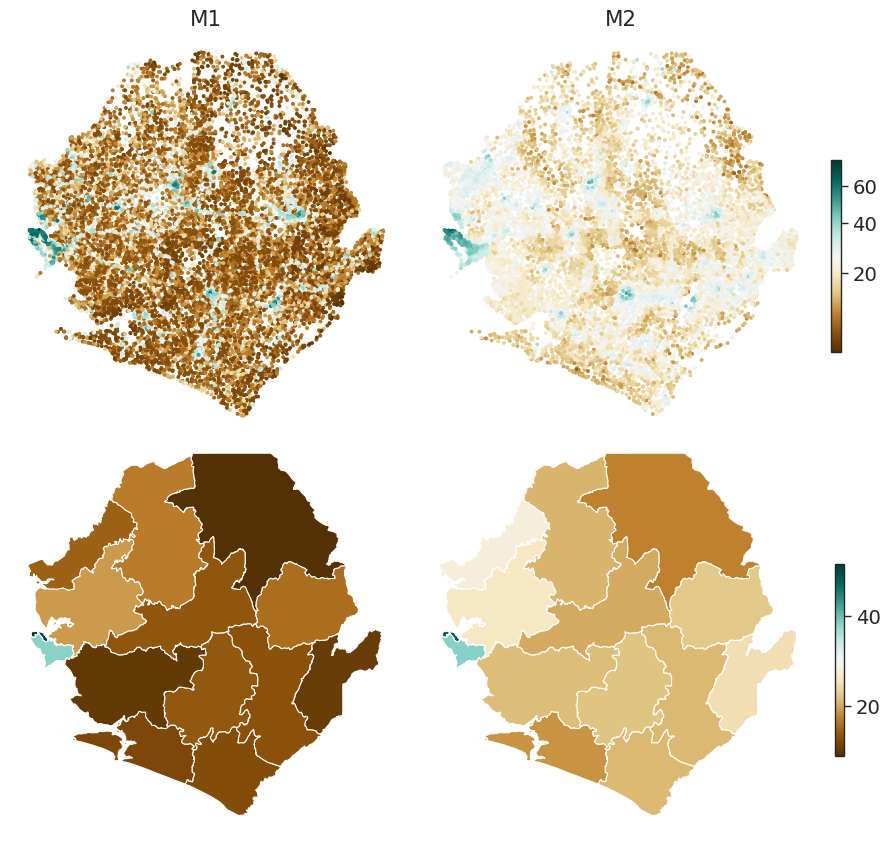

comparison-results/maps_HQ_DIST_LBR.pdf saved!


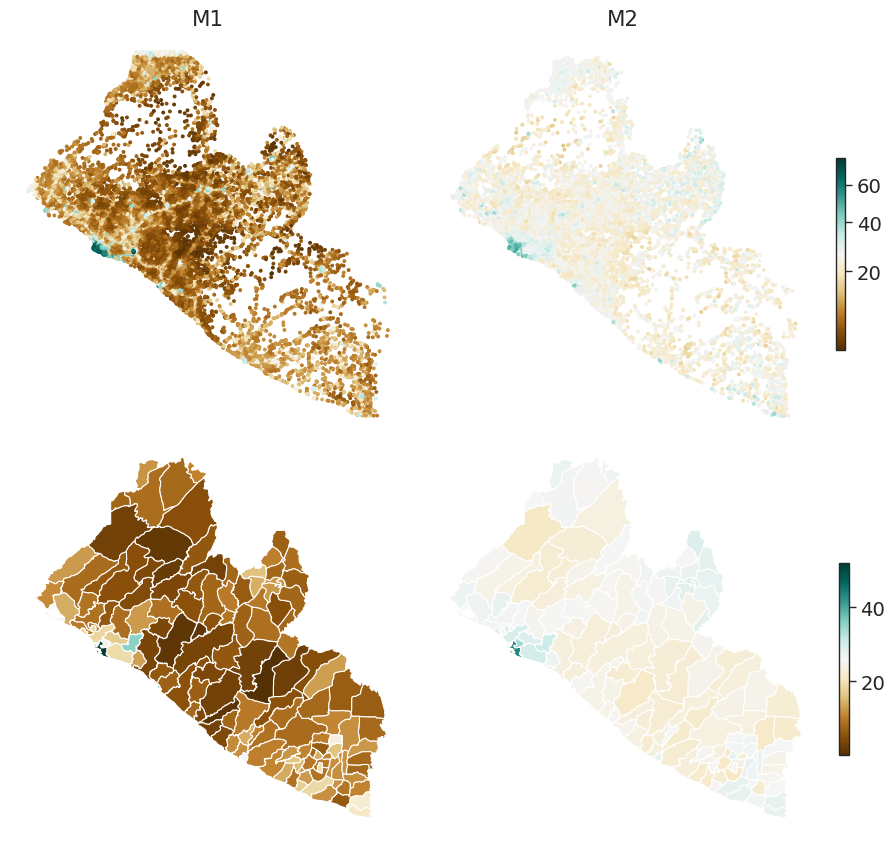

comparison-results/maps_HQ_DIST_UGA.pdf saved!


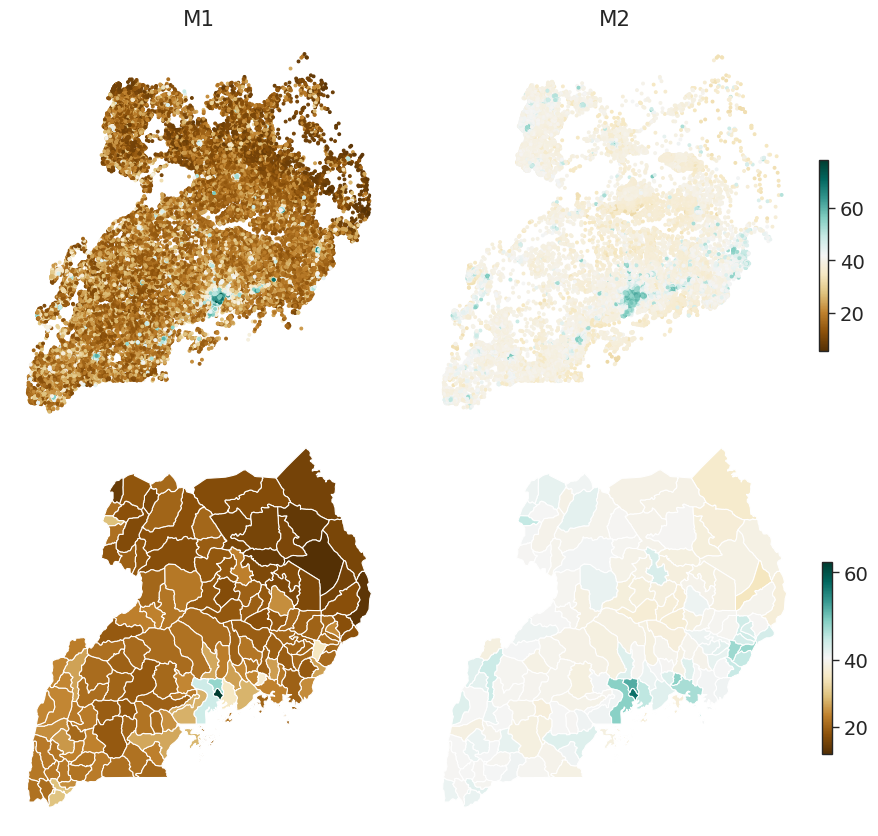

comparison-results/maps_HQ_DIST_RWA.pdf saved!


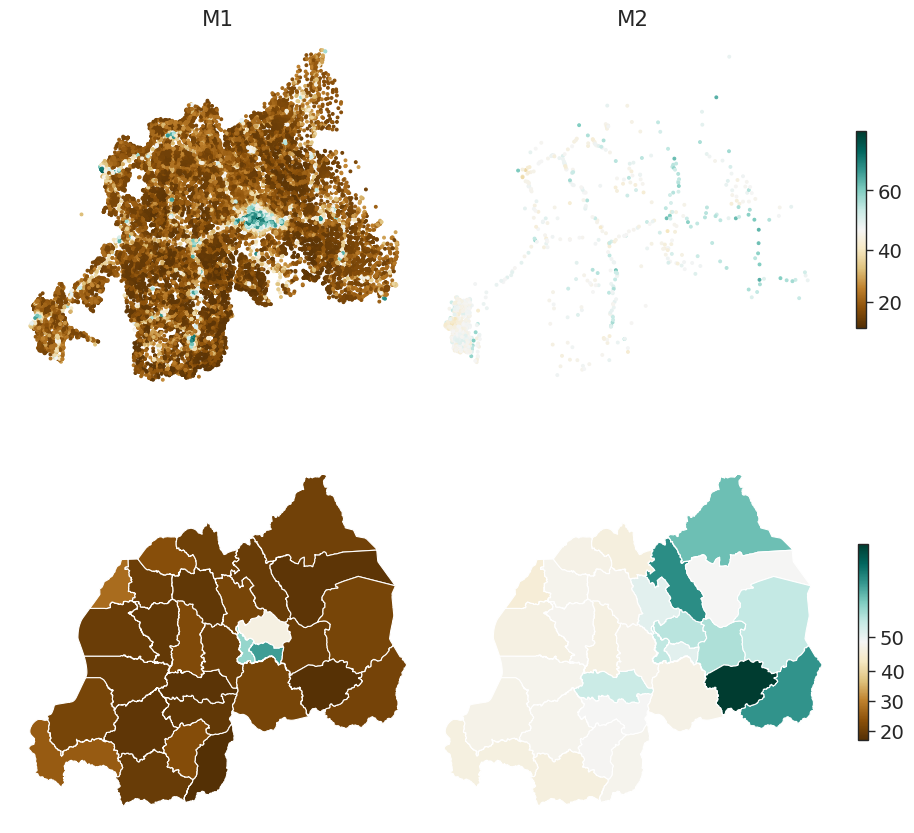

comparison-results/maps_HQ_DIST_ZAF.pdf saved!


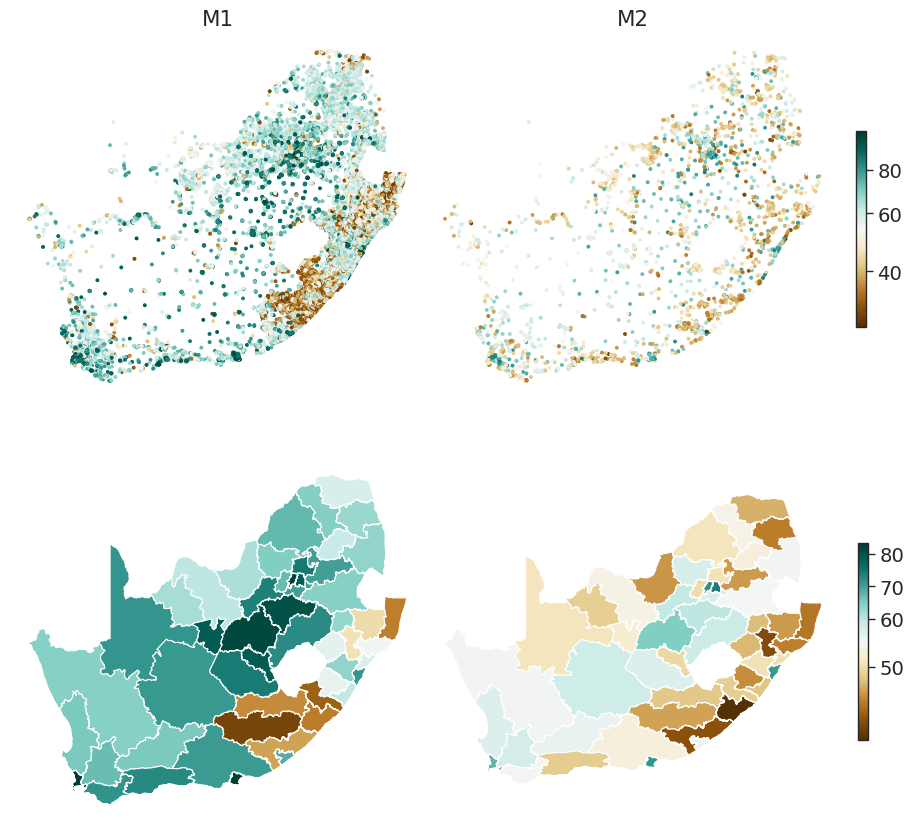

comparison-results/maps_HQ_DIST_GAB.pdf saved!


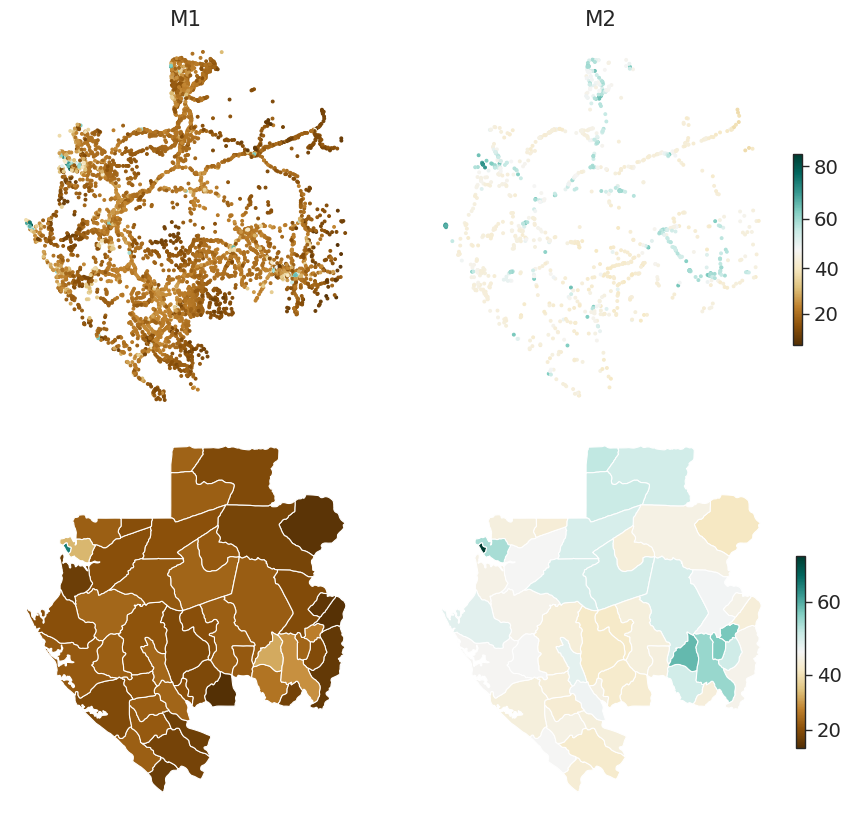

In [19]:
for country in COUNTRY_ORDER:
    gdf_rwi, gdf_lee, gdf_iwi = load_rwi_lee_iwi(country, best_models[country], features_source, RWI_PRED_PATH, LEE_PRED_PATH, IWI_PRED_PATH, rescale=RESCALE)
    plot_maps_HQ_DIST(country, [MLEE, MESP], gdf_rwi, gdf_lee, gdf_iwi, BOUNDARY_FN, ADMIN_LEVEL2, OUTPUT_DIR)

## Predicted Wealth Distributions

comparison-results/dist_SLE.pdf saved!


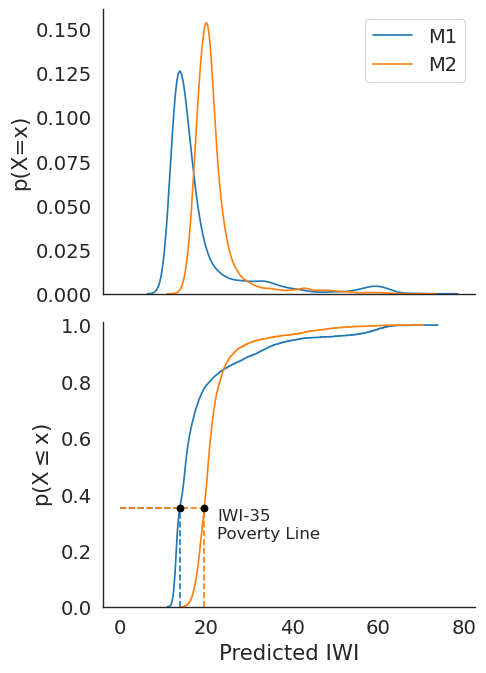

comparison-results/dist_LBR.pdf saved!


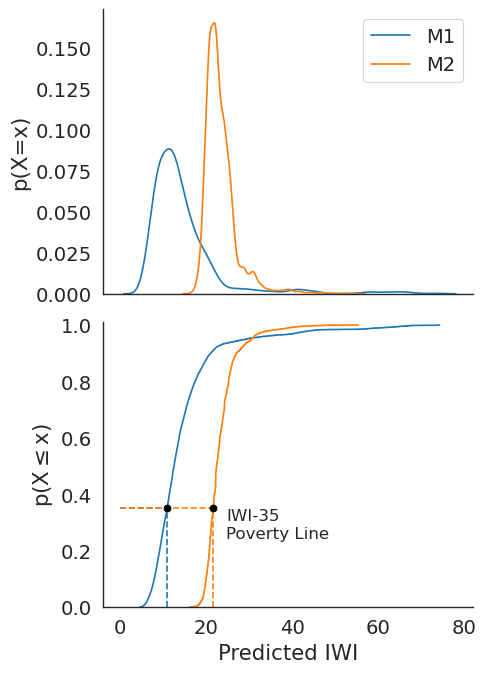

comparison-results/dist_UGA.pdf saved!


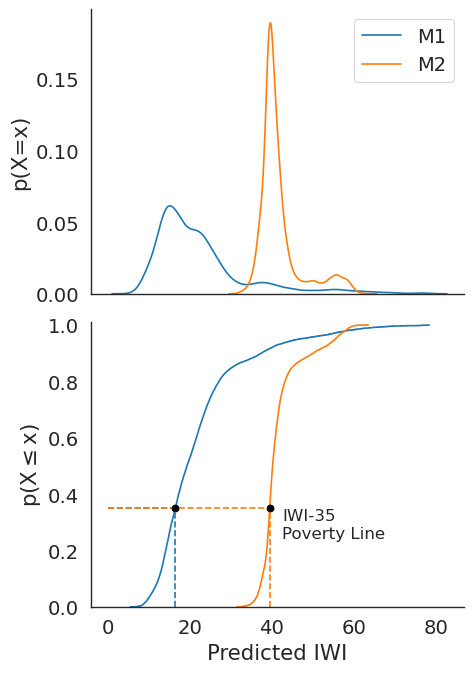

comparison-results/dist_RWA.pdf saved!


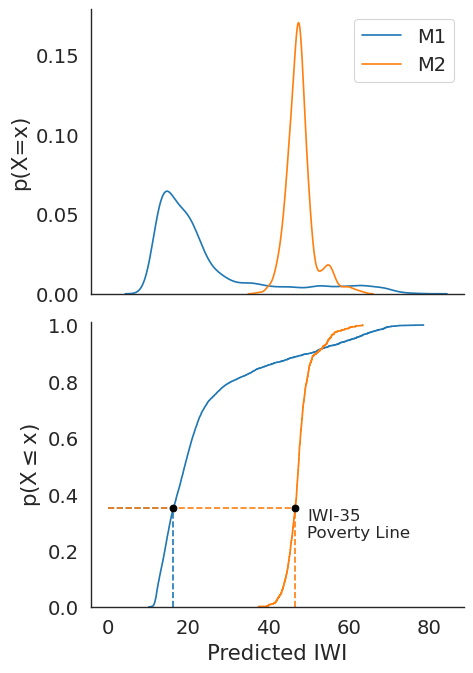

comparison-results/dist_ZAF.pdf saved!


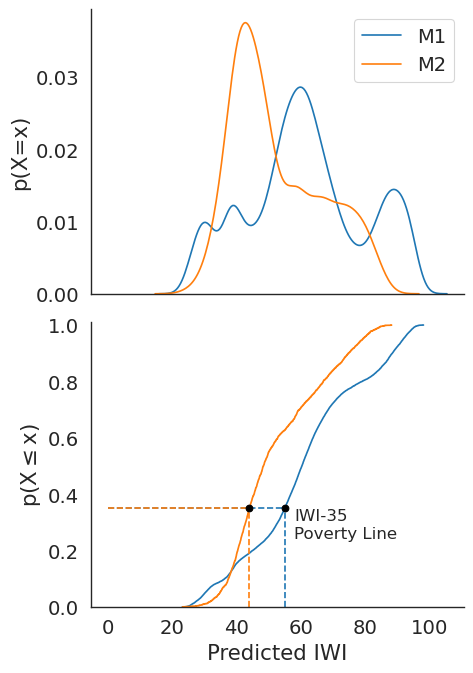

comparison-results/dist_GAB.pdf saved!


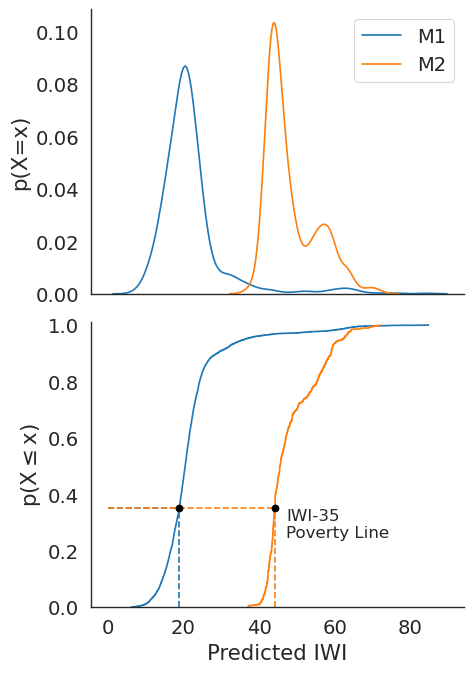

In [20]:
for country in COUNTRY_ORDER:
    gdf_rwi, gdf_lee, gdf_iwi = load_rwi_lee_iwi(country, best_models[country], features_source, RWI_PRED_PATH, LEE_PRED_PATH, IWI_PRED_PATH, rescale=RESCALE)
    plot_dist_combined(country, [MLEE, MESP], gdf_rwi, gdf_lee, gdf_iwi, BOUNDARY_FN, ADMIN_LEVEL2, OUTPUT_DIR)

## Overlapping Cells Comparison

[WARNING] 6227 6186 6199 computing mean...
comparison-results/samecells_SLE_M1_M2.pdf saved!


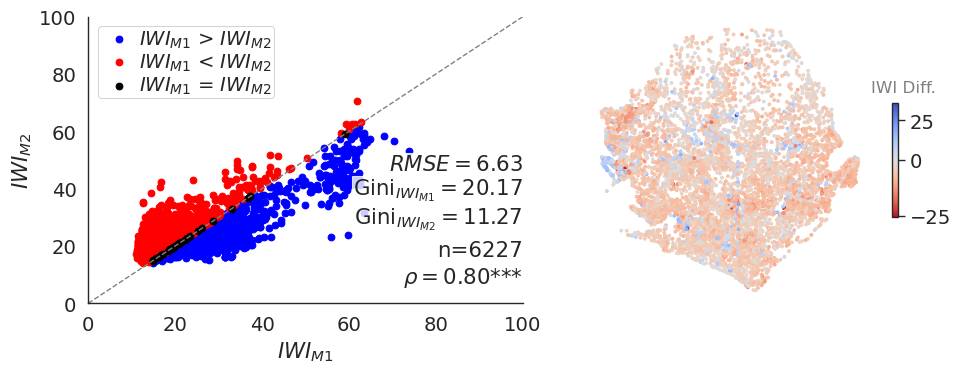

[WARNING] 13786 13755 13764 computing mean...
comparison-results/samecells_LBR_M1_M2.pdf saved!


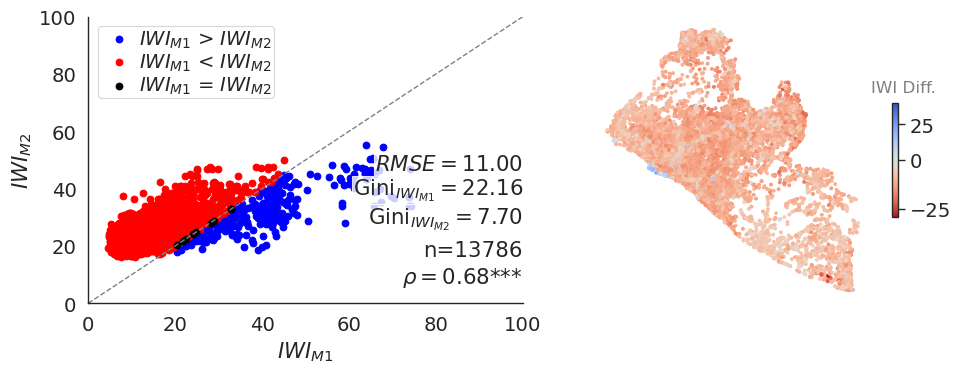

[WARNING] 10981 10915 10937 computing mean...
comparison-results/samecells_UGA_M1_M2.pdf saved!


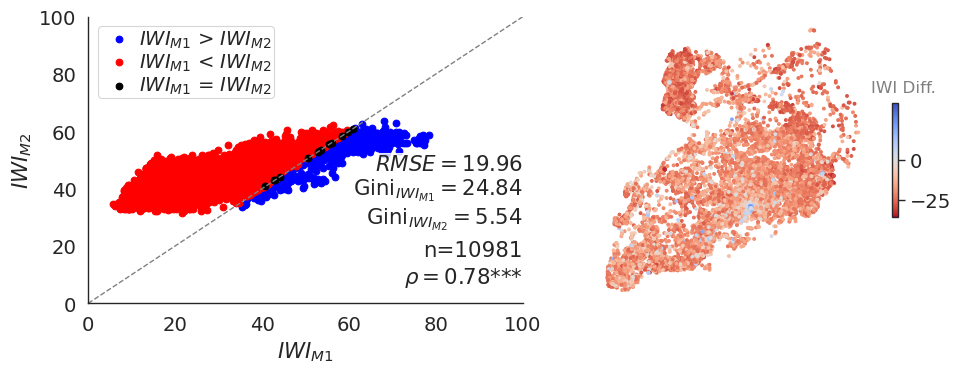

comparison-results/samecells_RWA_M1_M2.pdf saved!


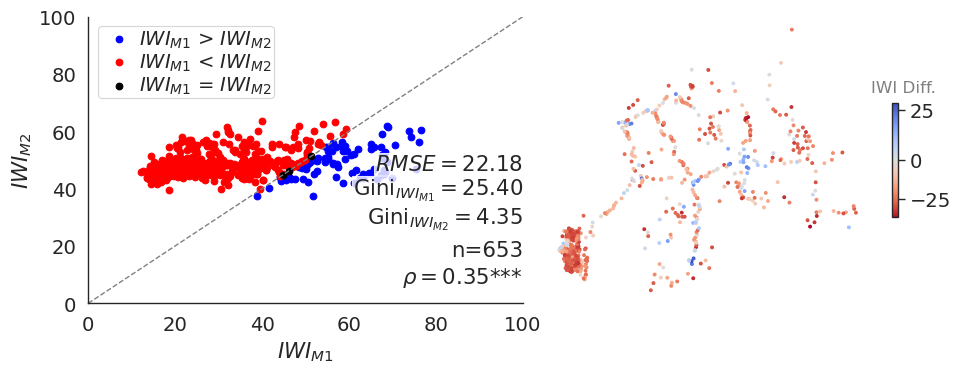

comparison-results/samecells_ZAF_M1_M2.pdf saved!


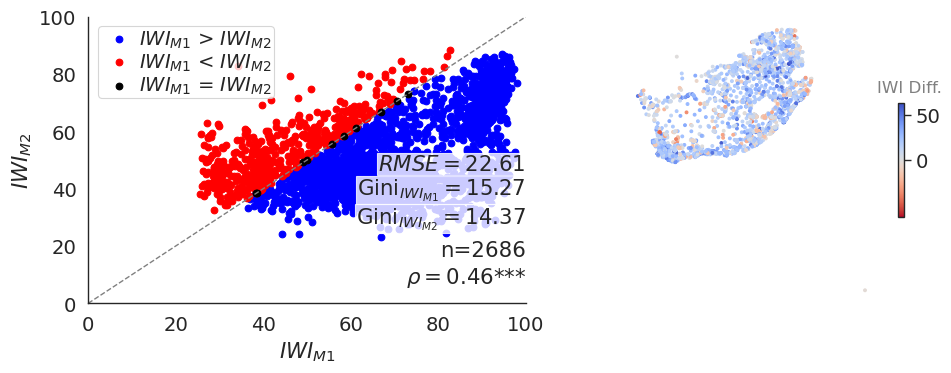

comparison-results/samecells_GAB_M1_M2.pdf saved!


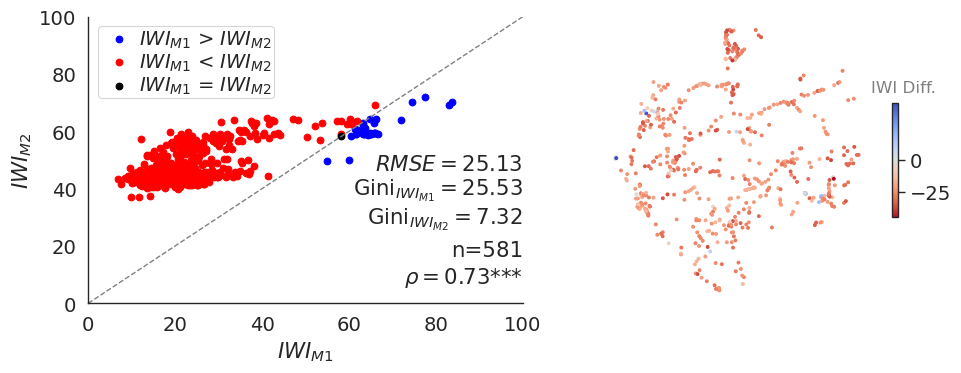

In [21]:
for country in COUNTRY_ORDER:
    gdf_rwi, gdf_lee, gdf_iwi = load_rwi_lee_iwi(country, best_models[country], features_source, RWI_PRED_PATH, LEE_PRED_PATH, IWI_PRED_PATH, rescale=RESCALE)
    plot_comparison_overlapping_cells(gdf_rwi=gdf_rwi, gdf_lee=gdf_lee, gdf_iwi=gdf_iwi, sources=(MLEE, MESP), country=country, output_dir=OUTPUT_DIR, **kwargs_overlap)

# Slides

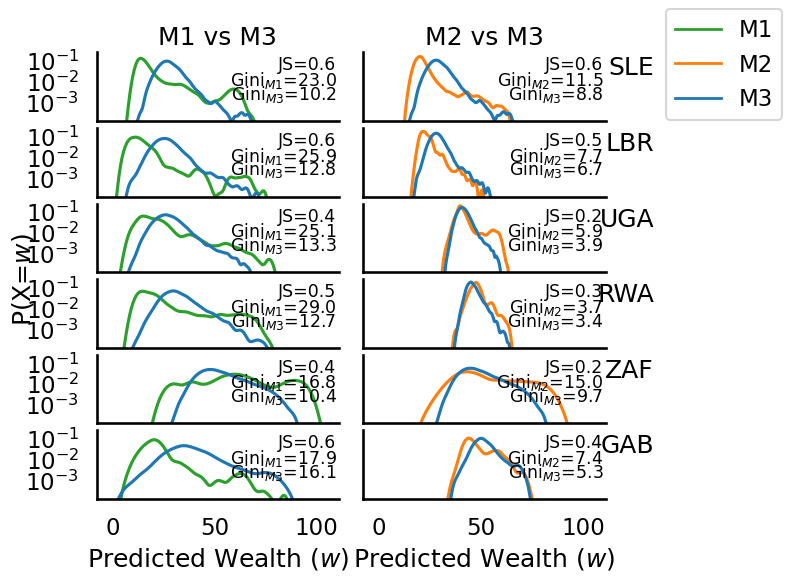

In [22]:
sns_talk_style()
plot_wealth_distributions(COUNTRY_ORDER, best_models, features_source, 
                          RWI_PRED_PATH, LEE_PRED_PATH, IWI_PRED_PATH, 
                          model_pairs=[[MLEE, MCHI],[MESP, MCHI]], 
                          output_dir=None, **{'figsize':(7,6), 'yscale':'log'})
sns_paper_style()